In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import plotly.figure_factory as ff
import plotly.express as px

In [8]:
data1 = pd.read_csv("heart.csv")

In [17]:
#the hardcoding, specifically selecting hypertensive patients BP 130 and more for all ages dataset 1

hypertension_patients = []
# for i,row in data1.iterrows():
#     if data1.loc[i, "RestingBP"] >= 130:
#         hypertension_patients.append(row)

for i,row in data1.iterrows():
    hypertension_patients.append(row)

htd_patients1 = pd.DataFrame(hypertension_patients, columns=['Age', 'Sex', 
     'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
     'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',  'HeartDisease'])


removing tuples with absurd values (like 0 BP)

In [18]:
data1=data1[(data1['RestingBP'] != 0) & (data1['Cholesterol'] != 0)]

In [19]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


htd_patients1 is now the new data frame exclusively containing hypertension patients from heart.csv

In [20]:
htd_patients1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [21]:
htd_patients1 = pd.get_dummies(htd_patients1, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [22]:
X1 = htd_patients1 [['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']]
Y1 = htd_patients1 [['HeartDisease']]

Note : allocator defines how many rows at then end to separate for validation purposes

In [23]:
allocator = 100
X_train, X_valid = X1[:-allocator], X1[-allocator:]
Y_train, Y_valid = Y1[:-allocator], Y1[-allocator:]

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [25]:
model.compile(loss="BinaryCrossentropy",
optimizer="adam",
metrics=["accuracy"])

In [26]:
history = model.fit(X_train, Y_train, epochs = 443,validation_data=(X_valid,Y_valid))

Epoch 1/443
21/21 [==============================] - 5s 37ms/step - loss: 3.8632 - accuracy: 0.4350 - val_loss: 1.7146 - val_accuracy: 0.4100
Epoch 2/443
21/21 [==============================] - 0s 13ms/step - loss: 1.4330 - accuracy: 0.3870 - val_loss: 0.9237 - val_accuracy: 0.4300
Epoch 3/443
21/21 [==============================] - 0s 15ms/step - loss: 0.8416 - accuracy: 0.4737 - val_loss: 0.7427 - val_accuracy: 0.4300
Epoch 4/443
21/21 [==============================] - 0s 17ms/step - loss: 0.7092 - accuracy: 0.5480 - val_loss: 0.6637 - val_accuracy: 0.6400
Epoch 5/443
21/21 [==============================] - 0s 19ms/step - loss: 0.6784 - accuracy: 0.5743 - val_loss: 0.6314 - val_accuracy: 0.6700
Epoch 6/443
21/21 [==============================] - 0s 12ms/step - loss: 0.6281 - accuracy: 0.6625 - val_loss: 0.6395 - val_accuracy: 0.6200
Epoch 7/443
21/21 [==============================] - 0s 13ms/step - loss: 0.6163 - accuracy: 0.6842 - val_loss: 0.5905 - val_accuracy: 0.7000
Epoch 

Learning CURVES

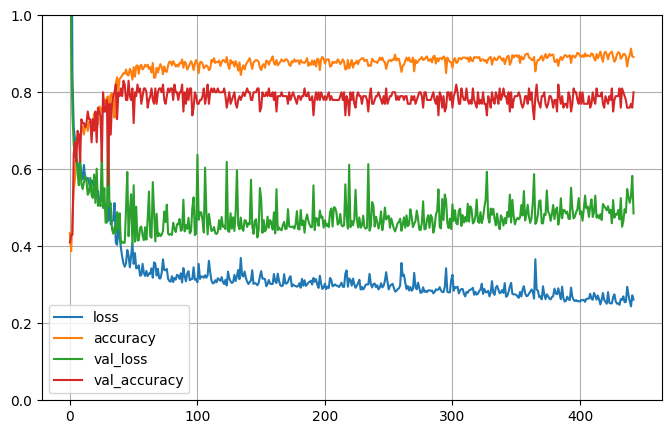

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
X_train.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [24]:
Age	= 49
RestingBP =	160
Cholesterol	= 180
FastingBS = 0
MaxHR = 156
Oldpeak = 1.0
Sex_F = 1
Sex_M = 0
ChestPainType_ASY = 0
ChestPainType_ATA = 0
ChestPainType_NAP = 1
ChestPainType_TA = 0
RestingECG_LVH = 0
RestingECG_Normal = 1
RestingECG_ST = 0
ExerciseAngina_N = 1
ExerciseAngina_Y = 0
ST_Slope_Down = 0
ST_Slope_Flat = 1
ST_Slope_Up = 0

In [25]:
new_patient = pd.DataFrame({"Age":[Age],"RestingBP":[RestingBP],"Cholesterol":[Cholesterol],"FastingBS":[FastingBS],"MaxHR":[MaxHR],"Oldpeak":[Oldpeak],"Sex_F":[Sex_F],"Sex_M":[Sex_M],"ChestPainType_ASY":[ChestPainType_ASY],"ChestPainType_ATA":[ChestPainType_ATA],"ChestPainType_NAP":[ChestPainType_NAP],"ChestPainType_TA":[ChestPainType_TA],"RestingECG_LVH":[RestingECG_LVH],"RestingECG_Normal":[RestingECG_Normal],"RestingECG_ST":[RestingECG_ST],"ExerciseAngina_N":[ExerciseAngina_N],"ExerciseAngina_Y":[ExerciseAngina_Y],"ST_Slope_Down":[ST_Slope_Down],"ST_Slope_Flat":[ST_Slope_Flat],"ST_Slope_Up":[ST_Slope_Up]})
model.predict(new_patient)

1/1 [==============================] - 0s 273ms/step


array([[0.590599]], dtype=float32)

In [6]:
import tkinter as tk

def calculate_metrics():
    # Get user inputs
    age = int(age_entry.get())
    cholesterol = float(cholesterol_entry.get())
    max_heart_rate = int(max_heart_rate_entry.get())
    gender = gender_var.get()  # 0 for male, 1 for female

    # Calculate health metrics (you can replace this with your actual logic)
    # Example: Calculate risk factors based on age, cholesterol, and heart rate

    # Display the results (you can customize this part)
    result_label.config(text=f"Gender: {'Male' if gender == 0 else 'Female'}\n"
                              f"Age: {age} years\n"
                              f"Cholesterol: {cholesterol} mg/dL\n"
                              f"Max Heart Rate: {max_heart_rate} bpm")

# Create the main window
window = tk.Tk()
window.title("Health Metrics Calculator")
window.geometry("400x300")

# Labels
Age_label = tk.Label(window, text="Age:")
RestingBP_label = tk.Label(window, text="RestingBP:")
Cholesterol_label = tk.Label(window, text="Cholesterol (mg/dL):")
FastingBS_label = tk.Label(window, text="Fasting BS:")
MaxHR_label = tk.Label(window, text="Max Heart Rate (bpm):")
Oldpeak_label = tk.Label(window, text="Oldpeak:")
Gender_label  = tk.Label(window, text="Gender:")
ChestPainType_label = tk.Label(window, text="Chest Pain Type:")
RestingECG_label = tk.Label(window, text="Resting ECG:")
ExerciseAngina_label = tk.Label(window, text="Exercise_angina:")
ST_Slope_label = tk.Label(window, text="ST Slope type:")


# Entry fields
age_entry = tk.Entry(window)
cholesterol_entry = tk.Entry(window)
max_heart_rate_entry = tk.Entry(window)

Age_label = tk.Entry(window)
RestingBP_label = tk.Entry(window)
Cholesterol_label = tk.Entry(window)
FastingBS_label = tk.Entry(window)
MaxHR_label = tk.Entry(window)
Oldpeak_label = tk.Entry(window)

# Gender toggle switch
gender_var = tk.IntVar()  # 0 for male, 1 for female
Sex_M_label = tk.Radiobutton(window, text="Male", variable=gender_var, value=0)
Sex_F_label = tk.Radiobutton(window, text="Female", variable=gender_var, value=1)

# chest pain toggle switch
ChestPainType_var=tk.IntVar()
ChestPainType_ASY_label = tk.Radiobutton(window, text="ASY", variable=ChestPainType_var, value=0)
ChestPainType_ATA_label = tk.Radiobutton(window, text="ATA", variable=ChestPainType_var, value=1)
ChestPainType_NAP_label = tk.Radiobutton(window, text="NAP", variable=ChestPainType_var, value=2)
ChestPainType_TA_label = tk.Radiobutton(window, text="TA", variable=ChestPainType_var, value=3)

#Resting ECG toggle switch
RestingECG_var=tk.IntVar()
RestingECG_LVH_label = tk.Radiobutton(window, text="LVH", variable=RestingECG_var, value=0)
RestingECG_Normal_label = tk.Radiobutton(window, text="Normal", variable=RestingECG_var, value=1)
RestingECG_ST_label = tk.Radiobutton(window, text="ST", variable=RestingECG_var, value=2)

#Exercise angina switch
ExerciseAngina_var = tk.IntVar()
ExerciseAngina_N_label = tk.Radiobutton(window, text="N", variable=ExerciseAngina_var, value=0)
ExerciseAngina_Y_label = tk.Radiobutton(window, text="Y", variable=ExerciseAngina_var, value=1)

#ST Slope curve
ST_Slope_Down_label
ST_Slope_Flat_label
ST_Slope_Up_label



# Calculate button
calculate_button = tk.Button(window, text="Calculate Metrics", command=calculate_metrics)

# Display results
result_label = tk.Label(window, text="", font=("Arial", 12))

# Place widgets on the screen
age_label.grid(row=0, column=0, padx=10, pady=5)
age_entry.grid(row=0, column=1, padx=10, pady=5)
cholesterol_label.grid(row=1, column=0, padx=10, pady=5)
cholesterol_entry.grid(row=1, column=1, padx=10, pady=5)
max_heart_rate_label.grid(row=2, column=0, padx=10, pady=5)
max_heart_rate_entry.grid(row=2, column=1, padx=10, pady=5)
gender_label.grid(row=3, column=0, padx=10, pady=5)
male_radio.grid(row=3, column=1, padx=10, pady=5)
female_radio.grid(row=3, column=2, padx=10, pady=5)
calculate_button.grid(row=4, column=0, columnspan=3, padx=10, pady=10)
result_label.grid(row=5, column=0, columnspan=3, padx=10, pady=10)

# Run the Tkinter event loop
window.mainloop()